# Plummer Sphere
The Plummer sphere is a model that is used to describe the distribution of stars in a cluster and was originally proposed by H.C. Plummer to fit observations of globular cluster behavior. This means that we have a density distribution, which is given as
$$\rho(r) = \frac{3M}{4\pi R^3}(1+(r/R)^2)^{-5/2}$$
in terms of the total mass $M$ and the Plummer radius $R$, which sets the size of the cluster. We expect this system to remain in a steady state with an isotropic velocity distribution, so if we initialize a system with the given distribution, we can evolve it forward in time and test whether the gravity solver is able to maintain the distribution. 

In [1]:
import phd
import numpy as np

The following method uses the technique outlined in [Aarseth et al. 1974](http://articles.adsabs.harvard.edu//full/1974A%26A....37..183A/0000186.000.html) to generate the distribution of particles for the Plummer model. Loosely, FINISH THIS.

In [2]:
def make_plummer(particles, M=1., R=1., r_cut_off=30):

    N = particles.get_carray_size()

    E = 3./64.*np.pi*M*M/R
    np.random.seed(0)
    i = 0; count = 0
    while i < N:

        count += 1

        x1 = np.random.uniform()
        x2 = np.random.uniform()
        x3 = 2*np.pi*np.random.uniform()

        r = (x1**(-2./3.)-1.)**(-1./2.)

        if r > r_cut_off:
            continue

        z = (1.-2.*x2)*r
        x = np.sqrt(r*r - z*z)*np.cos(x3)
        y = np.sqrt(r*r - z*z)*np.sin(x3)

        x5 = 0.1
        q  = 0.0
        while x5 > q*q*(1.-q*q)**3.5:

            x5 = 0.1*np.random.uniform()
            q = np.random.uniform()

        ve = np.sqrt(2)*(1. + r*r)**(-1./4.)
        v = q*ve

        x6 = np.random.uniform()
        x7 = 2*np.pi*np.random.uniform()

        vz = (1.-2.*x6)*v
        vx = np.sqrt(v*v - vz*vz)*np.cos(x7)
        vy = np.sqrt(v*v - vz*vz)*np.sin(x7)

        x *= 3.*np.pi/64.*M*M/E
        y *= 3.*np.pi/64.*M*M/E
        z *= 3.*np.pi/64.*M*M/E

        vx *= np.sqrt(E*64./3./np.pi/M)
        vy *= np.sqrt(E*64./3./np.pi/M)
        vz *= np.sqrt(E*64./3./np.pi/M)

        particles["position-x"][i] = x
        particles["position-y"][i] = y
        particles["position-z"][i] = z

        particles["velocity-x"][i] = vx
        particles["velocity-y"][i] = vy
        particles["velocity-z"][i] = vz

        i += 1

    particles["mass"][:] = M/count
    particles["ids"][:] = np.arange(N)

    # center at (50, 50, 50)
    particles["position-x"][:] += 50.
    particles["position-y"][:] += 50.
    particles["position-z"][:] += 50.

In [3]:
num_part = 1000
particles, units = phd.HydroParticleCreator(num_part, dim=3, unit_sys = "cgs")

make_plummer(particles, 1000., R=1., r_cut_off=10.)

# computation related to boundaries
#domain_manager = phd.DomainManager(
#        xmin=[0., 0., 0.], xmax=[100., 100., 100.], initial_radius=0.1, dim=3) 

domain_manager = phd.DomainManager(
        xmin=[0., 0., 0.], xmax=[100., 100., 100.], initial_radius=0.1) 


# setup gravity
gravity_tree = phd.GravityTree(barnes_angle=0.4, smoothing_length=0.03)

# computation
integrator = phd.Nbody(dt=0.005)
integrator.set_particles(particles)
integrator.set_domain_manager(domain_manager)
integrator.set_gravity_tree(gravity_tree)
integrator.set_units(units)

# add finish criteria
simulation_time_manager = phd.SimulationTimeManager()
simulation_time_manager.add_finish(phd.Time(time_max=0.5))

# output first step
output = phd.InitialOutput()
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

# output last step
output = phd.FinalOutput()
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

output = phd.IterationInterval(iteration_interval=25)
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

# Create simulator
simulation = phd.Simulation(simulation_name="plummer", colored_logs=True)
simulation.set_integrator(integrator)
simulation.set_simulation_time_manager(simulation_time_manager)
simulation.initialize()
simulation.solve()

phd: [INFO     ] 2021-06-02 19:52:31,370: 

 __________.__         .___
\______   \  |__    __| _/
 |     ___/  |  \  / __ |
 |    |   |   Y  \/ /_/ |
 |____|   |___|  /\____ |
               \/      \/
Welcome to Python Hydro-Dynamics!

Simulation Information
------------------------------
Running in serial
Log file saved at: plummer.log
Problem solving: plummer
Output data will be saved at: plummer_output

Classes used in the simulation
------------------------------
boundary_condition: Not Defined
domain_manager: DomainManager
gravity_tree: GravityTree
integrator: Nbody
mesh: Not Defined
particles: CarrayContainer
reconstruction: Not Defined
riemann: Not Defined

phd: [INFO     ] 2021-06-02 19:52:31,383: hdf5 format: Writting initial_output0000.hdf5
phd: [INFO     ] 2021-06-02 19:52:31,418: Beginning integration loop
phd: [INFO     ] 2021-06-02 19:52:31,419: Starting iteration: 0 time: 0.000000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:31,429: Starting iteration: 1 time: 0.0050

phd: [INFO     ] 2021-06-02 19:52:32,148: Starting iteration: 71 time: 0.355000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,159: Starting iteration: 72 time: 0.360000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,169: Starting iteration: 73 time: 0.365000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,179: Starting iteration: 74 time: 0.370000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,189: hdf5 format: Writting iteration_interval0002.hdf5
phd: [INFO     ] 2021-06-02 19:52:32,200: Starting iteration: 75 time: 0.375000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,210: Starting iteration: 76 time: 0.380000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,219: Starting iteration: 77 time: 0.385000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,229: Starting iteration: 78 time: 0.390000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,239: Starting iteration: 79 time: 0.395000 dt: 0.005000
phd: [INFO     ] 2021-06-02 19:52:32,248: Starting iteration: 80 time: 

We can then evaluate the results of the simulation by computing the density profile at different times and comparing them against the analytic Plummer prescription. Specifically, we can divide the simulation domain into spherical shells and compute the particle density in the shells to get an approximate measure of the density as a function of radius. Visual comparison of the initial, final, and analytic profiles show excellent agreement!

phd: [INFO     ] 2021-06-02 19:53:09,279: hdf5 format: Reading filename plummer_output/initial_output/initial_output0000/initial_output0000.hdf5
phd: [INFO     ] 2021-06-02 19:53:09,294: hdf5 format: Reading filename plummer_output/final_output/final_output0000/final_output0000.hdf5


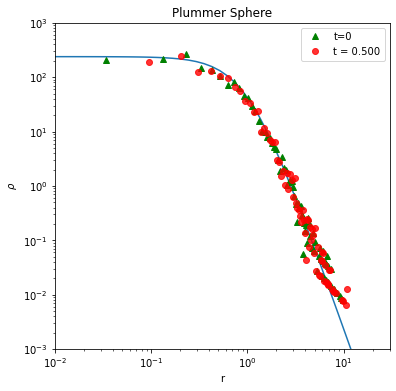

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def plummer(r, M=1.):
    return 3.*M/4./np.pi*(1.+r**2)**(-5./2.)

def radial_profile(particles):

    # find center mass
    totmass = 0.
    com = [0., 0., 0.]
    for i in range(particles.get_carray_size()):
        for j, ax in enumerate("xyz"):
            com[j] += particles["mass"][i]*particles["position-"+ax][i]
        totmass += particles["mass"][i]
    for j in range(3):
        com[j] /= totmass

    # create radius of particles
    radius = np.zeros(particles.get_carray_size())
    for i in range(particles.get_carray_size()):
        radius[i] = np.sqrt(
                (particles["position-x"][i]-com[0])**2 +\
                (particles["position-y"][i]-com[1])**2 +\
                (particles["position-z"][i]-com[2])**2)

    # create bin radius
    rmin, rmax = min(radius), max(radius)
    dr = 0.01*(rmax - rmin)
    radial_bins = np.arange(rmin, rmax + dr, dr)

    dens = np.zeros(radial_bins.size)
    for i in range(particles.get_carray_size()):
        index = 0
        while index+1 < len(radial_bins) and radius[i] > radial_bins[index+1]:
            index += 1
        dens[index] += particles["mass"][i]

    for i in range(len(radial_bins)):
        dens[i] /= (4*np.pi/3.*(3*radial_bins[i]*dr**2 + 3.*radial_bins[i]**2*dr + dr**3))

    return radial_bins, dens 

# initial output
io = phd.Hdf5()
file_name = "plummer_output/initial_output/initial_output0000/initial_output0000.hdf5"
initial_time = h5py.File(file_name, "r").attrs["time"]
initial_particles, units = io.read(file_name)

# final output
io = phd.Hdf5()
file_name = "plummer_output/final_output/final_output0000/final_output0000.hdf5"
final_time = h5py.File(file_name, "r").attrs["time"]
final_particles, units = io.read(file_name)

initial_radial, initial_dens = radial_profile(initial_particles)
final_radial, final_dens = radial_profile(final_particles)

fig, ax = plt.subplots(1,1, figsize=(6,6))
r_pl = np.logspace(-2, 2)

ax.set_title("Plummer Sphere")
ax.loglog(r_pl, plummer(r_pl, 1000.))
ax.loglog(initial_radial, initial_dens, 'g^', label=r"t=0")
ax.loglog(final_radial, final_dens, "or", alpha=0.8, label="t = %0.3f" % final_time)
ax.set_xlim(1.0E-2, 30)
ax.set_ylim(1.0E-3, 1.0E3)
ax.set_xlabel("r")
ax.set_ylabel(r"$\rho$")
ax.legend()
plt.show()